# Exercise 5

![GRAPHS](gphs.png)

## First Graph

Since the difference in computers between any two customers is at most 1 in this graph, (which is small compared to difference in socks), it plays almost no role in the grouping of the customers. Thus, a $K=2$ clustering here is essentially just considering the socks axis, which is mainly grouped into one cluster around the 7 socks mark (so black, pink, cyan, red, green, blue, and yellow) and one outlier at 11 socks (orange). 

## Second Graph

When scaling by the standard deviation, all values get transformed to relatively the same scale, meaning that the number of computers bought has a weight in determining the clusters. In this case, the difference in computers is around 1.3, which is quite large compared to differences in socks. Therefore, we would expect the clusters to be based around the computers - where black, orange, cyan, and green are in one cluster, and yellow, blue, red, and pink are in another.

## Third Graph

In this case, socks are insignificant, and we simply group by computers. This reuslts in the same grouping as above - black, orange, cyan, and green are in one cluster, and yellow, blue, red, and pink are in another.

# Exercise 9

## Part (a)

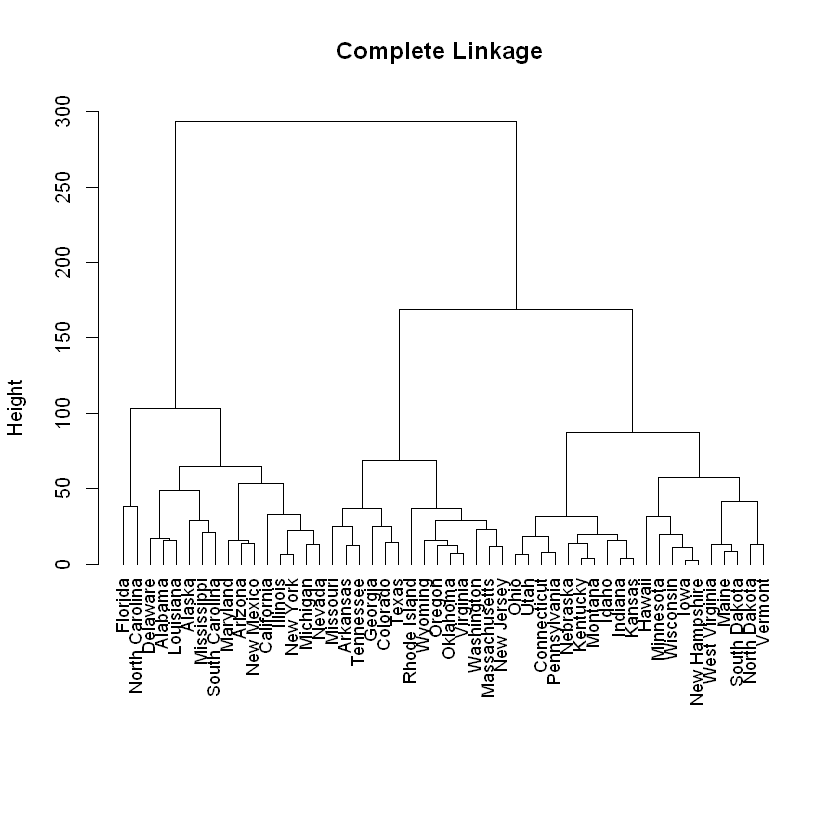

In [1]:
hcl = hclust(dist(USArrests), method="complete")
plot(hcl ,main="Complete Linkage ", xlab="", sub="", cex=.9, hang=-1)

## Part (b)

In [15]:
print(cutree(hcl,3))

       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
            

## Part (c)

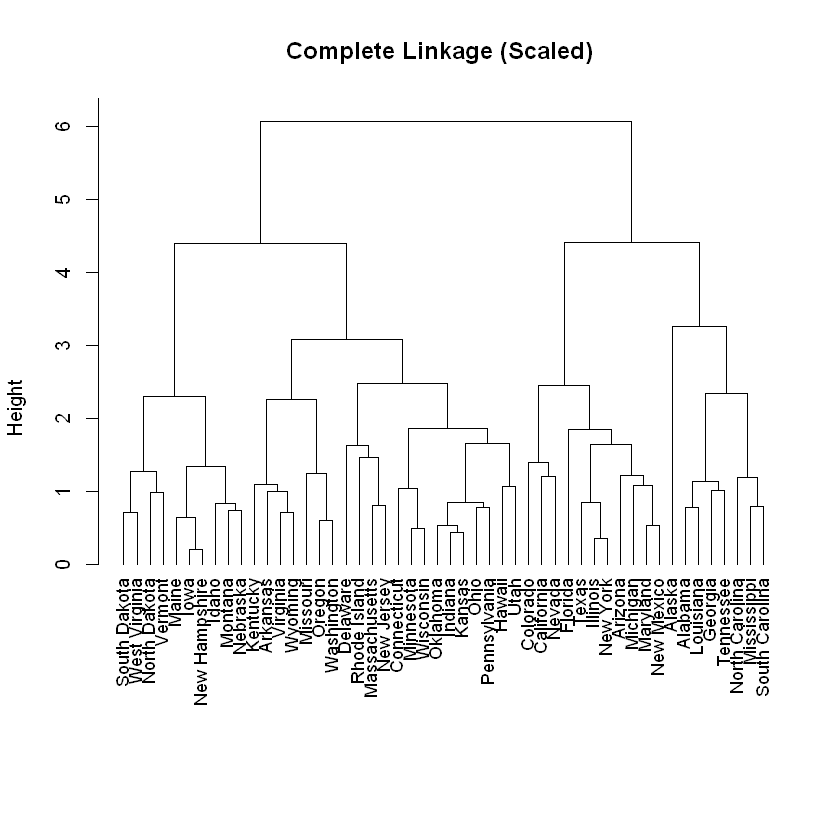

In [3]:
US.scale = scale(USArrests)
hcl = hclust(dist(US.scale), method="complete")
plot(hcl, main="Complete Linkage (Scaled) ", xlab="", sub="", cex=.9, hang=-1)

In [17]:
print(cutree(hcl,3))

       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
            

## Part (d)

Scaling the variables ensures that each variable is represented equally when considering the clustering of the data. This is similar to the previous exercise, where computers and socks where on completely different sclaes resulting in clustering that was biased towards one variable. Scaling helps adjust the magnitudes of the variables so that the clustering is evenly considered among all the variables. Variables should be scaled before computing inter-observation dissimilarities.

# Exercise 10

## Part (a)

In [79]:
K = 3 # Generate 3 clusters
obs_clusters = 20 # 20 observations per cluster
var = 50 # 50 variables

centers = as.data.frame(matrix(runif(K * var), nrow = K, ncol = var)) # Generate a data frame of three 50-d points for the centers of the clusters

In [92]:
data = as.data.frame(matrix(0, nrow = K*obs_clusters, ncol = var + 1)) # Generate a blank matrix representing observations
for (i in 1:var) {
    point = c()
    for (j in 1:K) {
        point = c(point, rnorm(obs_clusters, centers[j, i], 0.5)) # For every variable, generate 20 normally distributed points for each cluster with std. dev = 0.5
    }
    data[,i] = point
}
data[,var+1] = rep(1:K,rep(obs_clusters,K)) # Store the actual clusters assigned in the last column

## Part (b)

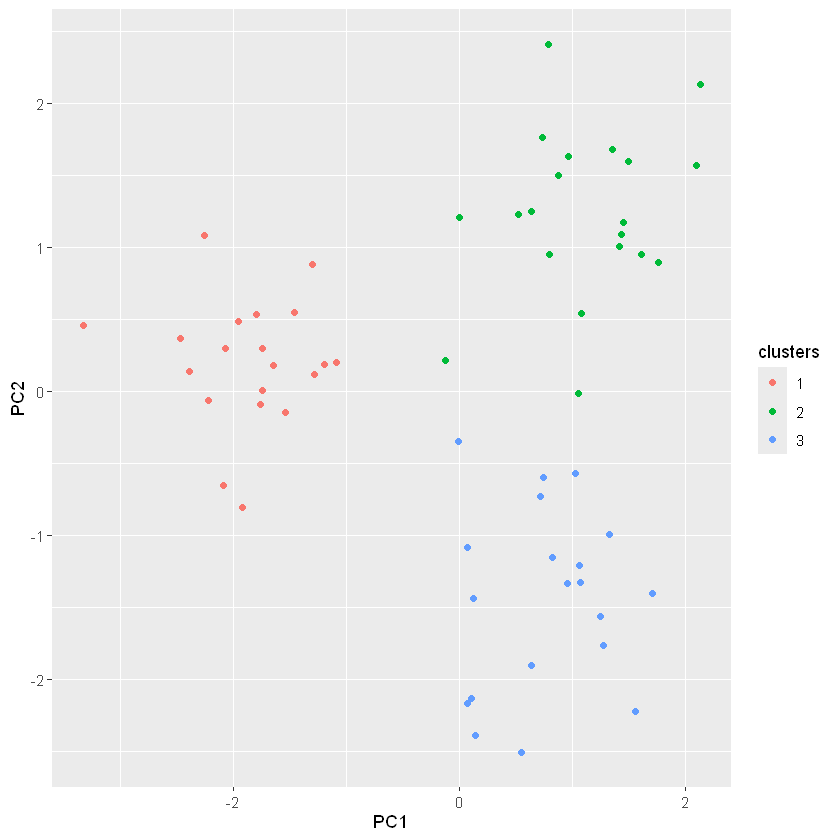

In [100]:
library(ggplot2)

points = data[,-(var+1)] # exclude column with actual labels

pca = prcomp(points)
PC1 = pca$x[,1]
PC2 = pca$x[,2]

clusters = as.factor(data[,51])

ggplot(points, aes(x=PC1, y=PC2, col=clusters)) + geom_point()

pcdata = data.frame(x=PC1, y=PC2)

We can easily see 3 clusters here!

## Part (c)

In [101]:
km.out = kmeans(points,K, nstart =1000)
table(data[,(var+1)], km.out$cluster)

   
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

The K-means clustering on the raw data has 100% accuracy!

## Part (d)

In [102]:
km.out = kmeans(points,K-1, nstart =1000)
table(data[,(var+1)], km.out$cluster)

   
     1  2
  1  0 20
  2 20  0
  3 20  0

When using $K=2$, the clusters corresponding to 2 and 3 get combined, but all the point sin cluster 1 get assigned to label 1.

## Part (e)

In [103]:
km.out = kmeans(points,K+1, nstart =1000)
table(data[,(var+1)], km.out$cluster)

   
     1  2  3  4
  1  0  0  0 20
  2 18  0  2  0
  3  0 11  9  0

All cluster 1 gets assigned label 4. Most of cluster 2 gets assigned label 2, with some getting assigned label 3 (which is expected as the number of actual clusters is less than the number of lables). Around half of cluster 3 gets assigned to label 1 and aroudn half get assigned to label 3.

## Part (f)

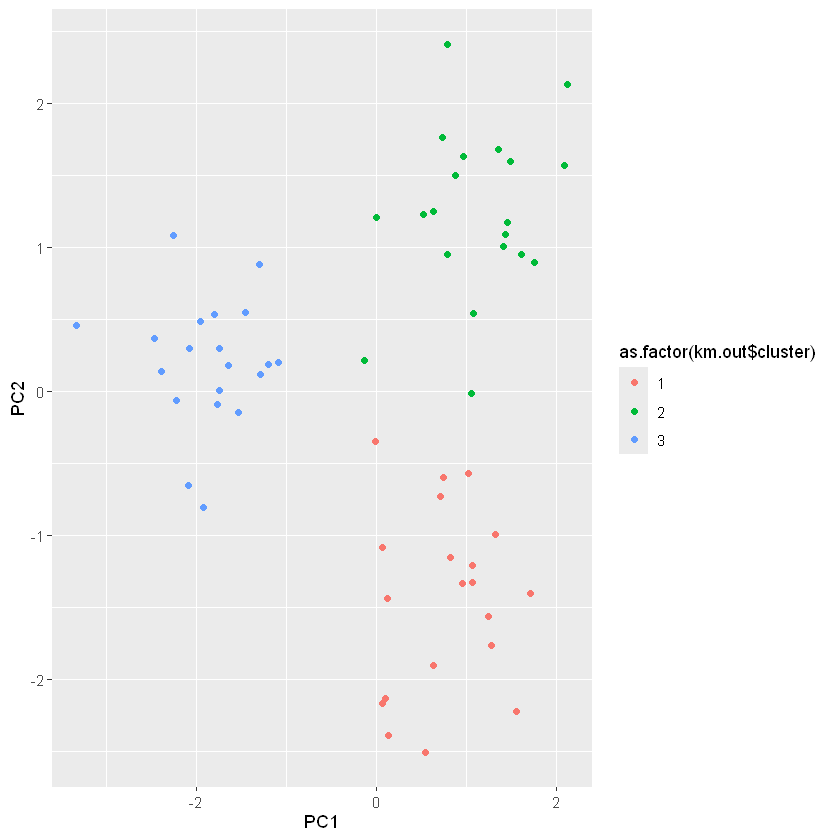

In [104]:
km.out = kmeans(pcdata,K, nstart=1000)
ggplot(data, aes(x=PC1, y=PC2, col=as.factor(km.out$cluster))) + geom_point()

In [105]:
table(data[,(var+1)], km.out$cluster)

   
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

The K-means on the PCA also results in 100% accuracy which is pretty good considering we flattened 48 dimensions!

## Part (g)

In [106]:
points.scale = scale(points)
km.out = kmeans(points.scale,K, nstart =1000)
table(data[,(var+1)], km.out$cluster)

   
     1  2  3
  1 20  0  0
  2  0  1 19
  3  0 20  0

Scaling the data actually resulted in 1 error (98.3% accuracy), which makes sense because points that were clearly further apart in the original data get scaled to be closer - so you would expect some overlap between the labels.